# Assignment 2: Exploratory Data Analysis

This assignment covers **Chapters 7, 8 and 14.1-14.2 (Up to but not including Chebychev’s Bounds)** from the textbook as well as lecture material from Weeks 3-4. Please complete this assignment by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

This assignment is due by **11:59pm on Tuesday, February 25**.

In [1]:
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

# This is if you want your plots to have the FiveThirtyEight style
plots.style.use('fivethirtyeight')

### Question 1. Unemployment

The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**a)** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [2]:
unemployment = Table.read_table('unemployment.csv')
unemployment.show(5)

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832


**b)** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.) Call the array `pter`.

In [3]:
pter = unemployment.column('NEI-PTER') - unemployment.column('NEI')

**c)** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order.  Call this new table `by_pter`.

In [4]:
by_pter = unemployment.with_column('PTER', unemployment.column('NEI-PTER') - unemployment.column('NEI'))

**d)** We want to create a line plot of the PTER over time. To do this, we first add a `year` array and the `pter` array to the `unemployment` table labeled `Year` and `PTER`, respectively. Use the code below to create `pter_over_time`.

In [5]:
# Make sure your previous sections have created by_pter and pter properly for this to work!
year = 1994 + np.arange(by_pter.num_rows)/4

In [6]:
year

array([1994.  , 1994.25, 1994.5 , 1994.75, 1995.  , 1995.25, 1995.5 ,
       1995.75, 1996.  , 1996.25, 1996.5 , 1996.75, 1997.  , 1997.25,
       1997.5 , 1997.75, 1998.  , 1998.25, 1998.5 , 1998.75, 1999.  ,
       1999.25, 1999.5 , 1999.75, 2000.  , 2000.25, 2000.5 , 2000.75,
       2001.  , 2001.25, 2001.5 , 2001.75, 2002.  , 2002.25, 2002.5 ,
       2002.75, 2003.  , 2003.25, 2003.5 , 2003.75, 2004.  , 2004.25,
       2004.5 , 2004.75, 2005.  , 2005.25, 2005.5 , 2005.75, 2006.  ,
       2006.25, 2006.5 , 2006.75, 2007.  , 2007.25, 2007.5 , 2007.75,
       2008.  , 2008.25, 2008.5 , 2008.75, 2009.  , 2009.25, 2009.5 ,
       2009.75, 2010.  , 2010.25, 2010.5 , 2010.75, 2011.  , 2011.25,
       2011.5 , 2011.75, 2012.  , 2012.25, 2012.5 , 2012.75, 2013.  ,
       2013.25, 2013.5 , 2013.75, 2014.  , 2014.25, 2014.5 , 2014.75,
       2015.  , 2015.25, 2015.5 , 2015.75, 2016.  , 2016.25])

In [7]:
pter_over_time = unemployment.with_columns('Year', year,'PTER',pter)

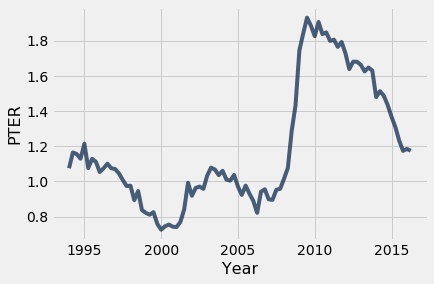

In [8]:
pter_over_time.select('Year','PTER').plot('Year')

Create a line plot using `pter_over_time`.

**e)** Were PTER rates high during or directly after the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)?

### Question 2. Causes of Death by Year

This exercise is designed to give you practice using the Table method `pivot`. [Here](http://data8.org/sp19/python-reference.html) is a link to the Python reference page in case you need a quick refresher.

We'll be looking at a [dataset](http://www.healthdata.gov/dataset/leading-causes-death-zip-code-1999-2013) from the California Department of Public Health that records the cause of death, as recorded on a death certificate, for everyone who died in California from 1999 to 2013.  The data is in the file `causes_of_death.csv`. Each row records the number of deaths by a specific cause in one year in one ZIP code.

In [2]:
causes = Table.read_table('causes_of_death.csv')
causes

Year,ZIP Code,Cause of Death,Count,Location
1999,90002,SUI,1,"(33.94969, -118.246213)"
1999,90005,HOM,1,"(34.058508, -118.301197)"
1999,90006,ALZ,1,"(34.049323, -118.291687)"
1999,90007,ALZ,1,"(34.029442, -118.287095)"
1999,90009,DIA,1,"(33.9452, -118.3832)"
1999,90009,LIV,1,"(33.9452, -118.3832)"
1999,90009,OTH,1,"(33.9452, -118.3832)"
1999,90010,STK,1,"(34.060633, -118.302664)"
1999,90010,CLD,1,"(34.060633, -118.302664)"
1999,90010,DIA,1,"(34.060633, -118.302664)"


The causes of death in the data are abbreviated.  We've provided a table called `abbreviations.csv` to translate the abbreviations.

In [3]:
abbr = Table.read_table('abbreviations.csv')

The dataset is missing data on certain causes of death, such as homicide and hypertensive renal disease, for certain years.  It looks like those causes of death are relatively rare, so for some purposes it makes sense to drop them from consideration.  Of course, we'll have to keep in mind that we're no longer looking at a comprehensive report on all deaths in California.

**a)** Let's clean up our data. First, filter out the HOM, HYP, and NEP rows from the table for the reasons described above. Next, join together the abbreviations table and our causes of death table so that we have a more detailed discription of each disease in each row (for help on how to do this, see **Chapter 8.4**). Lastly, drop the column which contains the acronym of the disease, and rename the column with the full description 'Cause of Death'. Assign the variable `cleaned_causes` to the resulting table. 

*Hint:* You should expect this to take more than one line. Use many lines and many intermediate tables to complete this question. 

**b)** We're going to examine the changes in causes of death over time.  To make a plot of those numbers, we need to have a table with one row for each year and a column for each kind of death, where each cell contains the number of deaths by that cause in that year. Create this table and call it `cleaned_causes_by_year` (for help on how to do this, see **Chapter 8.3**).

**c)** Make a plot of all the causes of death by year, using your cleaned-up version of the dataset.  There should be a single plot with one line per cause of death.

*Hint:* Use the Table method `plot`.  If you pass only a single argument, a line will be made for each of the other columns.

**d)** After seeing the plot above, we would now like to examine the distributions of diseases over the years using percentages. Below, we have assigned `distributions` to a table with all of the same columns, but the raw counts in the cells are replaced by the percentage of the the total number of deaths by a particular disease that happened in that specific year. 

Try to understand the code below and explain, in words, what it does.

In [ ]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

labels = cleaned_causes_by_year.labels
labels

distributions = Table().with_columns(labels[0], cleaned_causes_by_year.column(0),
                                     labels[1], percents(cleaned_causes_by_year.column(1)),
                                     labels[2], percents(cleaned_causes_by_year.column(2)),
                                     labels[3], percents(cleaned_causes_by_year.column(3)),
                                     labels[4], percents(cleaned_causes_by_year.column(4)),
                                     labels[5], percents(cleaned_causes_by_year.column(5)),
                                     labels[6], percents(cleaned_causes_by_year.column(6)),
                                     labels[7], percents(cleaned_causes_by_year.column(7)),
                                     labels[8], percents(cleaned_causes_by_year.column(8)),
                                     labels[9], percents(cleaned_causes_by_year.column(9)),
                                     labels[10], percents(cleaned_causes_by_year.column(10)),
                                     labels[11], percents(cleaned_causes_by_year.column(11)))
distributions.show()

**e)** We suspect that the larger percentage of stroke-related deaths over the years 1999-2013 happened in the earlier years, while the larger percentage of deaths related to Chronic Liver Disease over this time period occured in the most recent years. Draw a bar chart to display both of the distributions of these diseases over the time period. What is your conclusion based on the bar chart?

*Hint:* The relevant column labels are "Cerebrovascular Disease (Stroke)" and "Chronic Liver Disease and Cirrhosis"

### Question 3. Cards Against Humanity - Pulse of the Nation Public Opinion Poll

In this question, we'll explore the Cards Against Humanity poll dataset further using the tools we've learned. For your convenience, we have made a subset of the data available to you in a CSV file called `201709-CAH_PulseOfTheNation.csv`.

In [2]:
cah = Table.read_table('201709-CAH_PulseOfTheNation.csv')

**a)** Write a function called `is_not_zero` which takes a numerical input and returns `True` if the value isn't 0 and `False` if the value is 0.

**b)** Add a new column to `cah` called "Has watched any Transformers movies" which is `True` if the person has watched any Transformers movies and `False` if they haven't. 

*Hint:* Use the `apply` method. See **Chapter 8.1** for details.

**c)** How many people have watched any Transformers movies? How many have not? Use the `group` method to find the answer.

**d)** Do people who are less educated tended to believe in ghosts more? Use summaries and at least one visualization to support your answer.

*Hint:* Find a summary using the `pivot` method and use the `barh` method to get a barchart.